In [97]:
import cv2
from matplotlib import pyplot as plt


def print_image(image, title='Sample image'):
    if isinstance(image, str):
        image = cv2.imread(image)

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.xticks([]), plt.yticks([])
    plt.show()

## Pixel Annotations:
- 1: Foreground 2:Background 3: Not classified

In [60]:
path = "/home/ndygr/Downloads/oxford-iiit-pet/annotations/trimaps/Abyssinian_1.png"
mask = cv2.imread(path)
mask_cp = mask.copy()
mask_cp -= 1            # tensorflow tutorial에서는 mask -= 1 로 normalize를 해주었음.
mask_cp *= 80

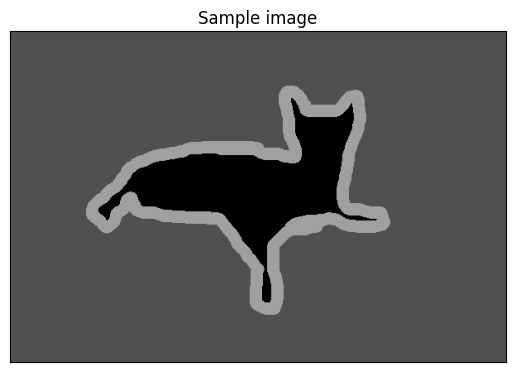

In [61]:
print_image(mask_cp)

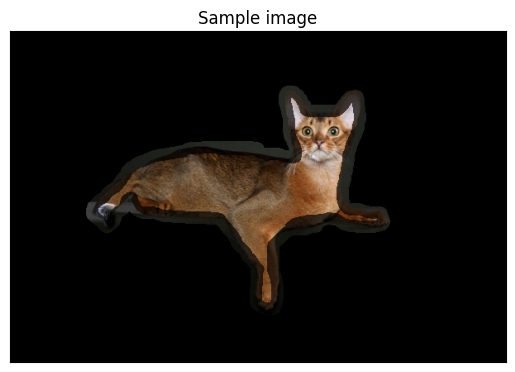

In [62]:
image_path = "/home/ndygr/Downloads/oxford-iiit-pet/images/Abyssinian_1.jpg"

image = cv2.imread(image_path)
image_cp = image.copy()

foreground = mask==1
background = mask==2
not_classified = mask==3

image_cp[background] = image[background] * 0
image_cp[not_classified] = image[not_classified] * 0.3

print_image(image_cp)

ImageMagick를 이용하여 mask를 시각화하는 방법
- https://stackoverflow.com/questions/41777654/opencv-using-a-trimap-image

__(shell code)__ <br>
- identify -verbose Abyssinian_1trimap.png  | more <br>
- convert Abyssinian_1trimap.png -auto-level trimap.jpg <br>
- convert Abyssinian_1.jpg \( Abyssinian_1trimap.png -fill white -opaque "rgb(1,1,1)" -opaque "rgb(3,3,3)" -fill black -opaque "rgb(2,2,2)" \) -compose darken -composite pet.png <br>
- convert Abyssinian_1.jpg \( Abyssinian_1trimap.png -fill white -opaque "rgb(1,1,1)" -fill black -opaque "rgb(3,3,3)" -opaque "rgb(2,2,2)" -blur 0x8  \) -compose darken -composite pet.png

<br>

---

## read xmls

In [72]:
xml_path = "/home/ndygr/Downloads/oxford-iiit-pet/annotations/xmls/Abyssinian_1.xml"

In [93]:
file = open(xml_path, "r").read()
file

'<annotation><folder>OXIIIT</folder><filename>Abyssinian_1.jpg</filename><source><database>OXFORD-IIIT Pet Dataset</database><annotation>OXIIIT</annotation><image>flickr</image></source><size><width>600</width><height>400</height><depth>3</depth></size><segmented>0</segmented><object><name>cat</name><pose>Frontal</pose><truncated>0</truncated><occluded>0</occluded><bndbox><xmin>333</xmin><ymin>72</ymin><xmax>425</xmax><ymax>158</ymax></bndbox><difficult>0</difficult></object></annotation>\n'

In [73]:
import xml.etree.ElementTree as ET

tree = ET.parse(xml_path)
root = tree.getroot()

print(f"Root tag: {root.tag}")

Root tag: annotation


In [ ]:
def print_xml_structure(elem, level=0):
    
    indent = '\t' * level
    print(f"{indent}<{elem.tag}", end='')
    
    if elem.attrib:
        print(" " + " ".join([f'{k}="{v}"' for k, v in elem.attrib.items()]), end="")
    
    # Print closing bracket
    print(">")
    
    if elem.text:
        print(f"{indent}  {elem.text.strip()}")
    
    for child in elem:
        print_xml_structure(child, level+1)
        
    print(f"{indent}</{elem.tag}>")

   
print_xml_structure(root)

In [65]:
for child in root:
    print(child.tag, child.text)

folder OXIIIT
filename Abyssinian_1.jpg
source None
size None
segmented 0
object None


In [66]:
for child in root:
    
    if child.tag=='object':
        for size in child:
            print(size.tag, ':', size.text)
    else:
        continue
    
    #attribute를 가져오려면 child.attrib을 사용해야함.
    print(child.tag, ':', child.text)

name : cat
pose : Frontal
truncated : 0
occluded : 0
bndbox : None
difficult : 0
object : None


In [91]:
def find_text_by_tag(root, tag_name):
    # Find all elements with the specified tag
    elements = root.findall(f".//{tag_name}")
    # Extract and return the text of each element
    return [elem.text for elem in elements if elem is not None]

tag_names = ['xmin', 'ymin', 'xmax', 'ymax']

bbox = [int(find_text_by_tag(root, tag_name)[0]) for tag_name in tag_names]
bbox

[333, 72, 425, 158]

In [96]:
name = find_text_by_tag(root, 'name')[0]
name

'cat'

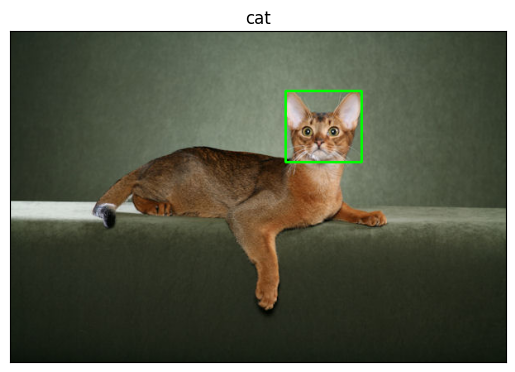

In [98]:
image_cp2 = image.copy()
image_cp2 = cv2.rectangle(image_cp2, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (0, 255, 0), 2)

print_image(image_cp2, name)